In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [1]:
# Load Data and Preprocess
def load_data(filepath):
    df = pd.read_csv(filepath, sep=';')
    le = LabelEncoder()
    categorical_cols = ['job', 'marital', 'education', 'default',
                        'housing', 'loan', 'contact', 'month',
                        'poutcome', 'y']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    features = ['age', 'balance', 'campaign', 'previous',
                'job', 'education', 'housing', 'loan', 'default']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, df


#================ FOR PCA Dimensionality reduction =========
def apply_pca(x, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(x)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained variance by Component")

    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Data Distribution in PCA Space")

    plt.tight_layout()
    plt.show()

    return X_pca


#================ FOR K-Means ===============================
def find_optimal_clusters(x, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        km = KMeansClustering(n_clusters=k)
        km.fit(x)
        inertias.append(calculate_inertia(x, km.labels, km.centroids))

    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel("k")
    plt.ylabel("Inertia")
    plt.title("Elbow Curve")
    plt.show()

    return inertias


def perform_kmeans_clustering(x, n_clusters=None):
    km = KMeansClustering(n_clusters=n_clusters)
    km.fit(x)
    return km.labels, km.centroids


#================ FOR Agglomerative ===============================
def perform_agglomerative_clustering(x, n_clusters=None):
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg.fit_predict(x)
    return labels


#================FOR Dendrogram===============================
def get_linkages(x):
    linked = linkage(x, method='ward')
    return linked


def plot_dendrogram(linked):
    plt.figure(figsize=(10, 5))
    dendrogram(linked)
    plt.title("Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()


## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

In [4]:
def load_data(filepath):
    df = pd.read_csv(filepath, sep=';')
    le = LabelEncoder()
    categorical_cols = ['job', 'marital', 'education', 'default',
                        'housing', 'loan', 'contact', 'month',
                        'poutcome', 'y']
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    features = ['age', 'balance', 'campaign', 'previous',
                'job', 'education', 'housing', 'loan', 'default']
    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, df

X_scaled, data = load_data('bank-full.csv')
print("Data shape:", X_scaled.shape)


Data shape: (45211, 9)


In [5]:
class KMeansClustering:
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        np.random.seed(self.random_state)
        idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[idx]

    def _assign_clusters(self, X):
        distances = np.linalg.norm(X[:, None] - self.centroids[None, :], axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        new_centroids = []
        for i in range(self.n_clusters):
            points = X[labels == i]
            if len(points) == 0:
                new_centroids.append(self.centroids[i])
            else:
                new_centroids.append(points.mean(axis=0))
        return np.array(new_centroids)

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            labels = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, labels)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        self.labels = self._assign_clusters(X)
        return self

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)


## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

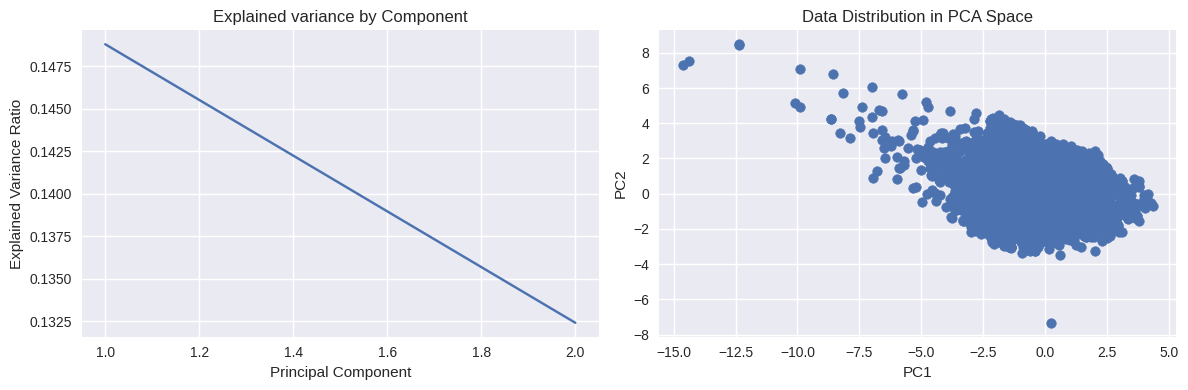

Shape after PCA: (45211, 2)


In [6]:
def apply_pca(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.title("Explained variance by Component")

    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:, 0], X_pca[:, 1])
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Data Distribution in PCA Space")

    plt.tight_layout()
    plt.show()

    return X_pca

X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)


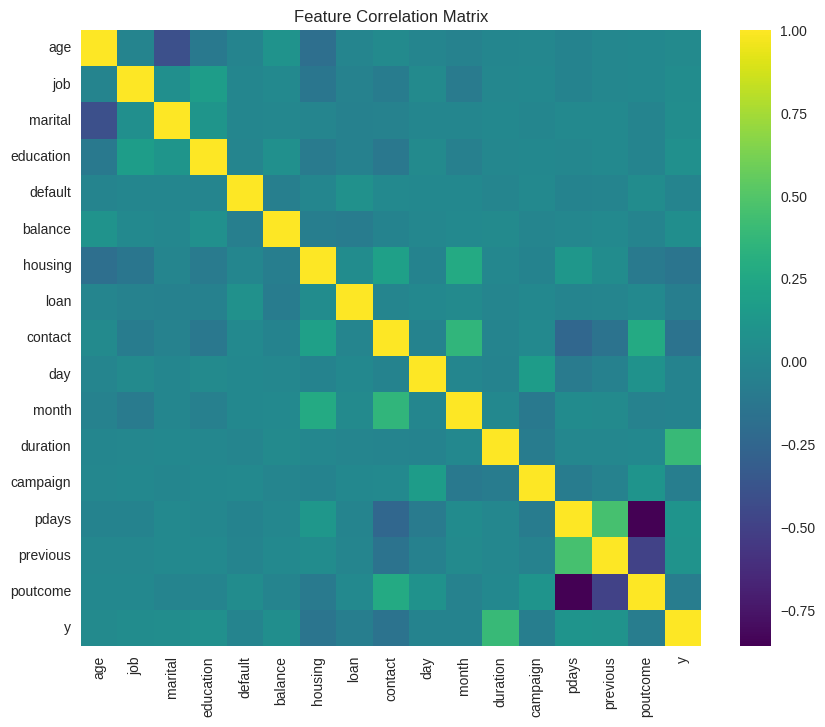

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap='viridis')
plt.title("Feature Correlation Matrix")
plt.show()


## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

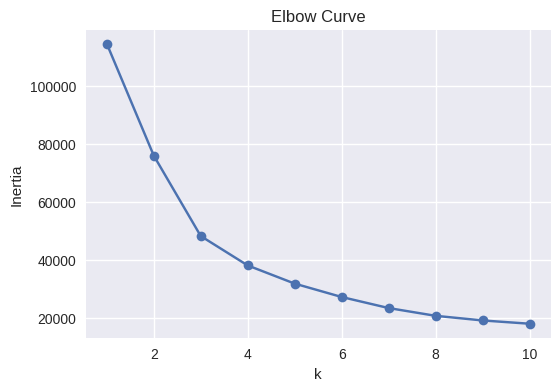

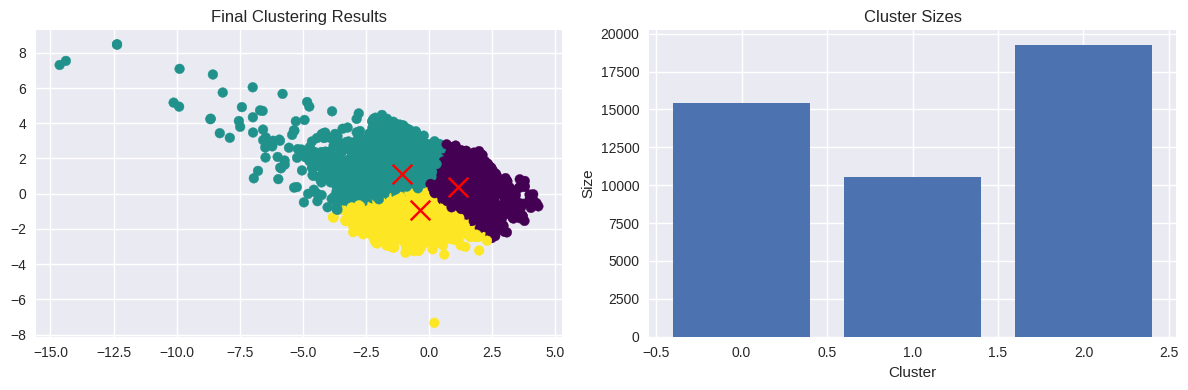


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


In [7]:
def calculate_inertia(X, labels, centroids):
    inertia = 0
    for i in range(centroids.shape[0]):
        pts = X[labels == i]
        inertia += np.sum((pts - centroids[i])**2)
    return inertia

def plot_elbow_curve(X, max_k=10):
    inertias = []
    K = range(1, max_k + 1)
    for k in K:
        km = KMeansClustering(n_clusters=k)
        km.fit(X)
        inertias.append(calculate_inertia(X, km.labels, km.centroids))

    plt.figure(figsize=(6, 4))
    plt.plot(list(K), inertias, marker='o')
    plt.xlabel("k")
    plt.ylabel("Inertia")
    plt.title("Elbow Curve")
    plt.show()

    return inertias

inertias = plot_elbow_curve(X_pca)

kmeans = KMeansClustering(n_clusters=3)
kmeans.fit(X_pca)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1],
            c='red', marker='x', s=200)
plt.title('Final Clustering Results')

plt.subplot(1, 2, 2)
plt.bar(range(len(np.bincount(kmeans.labels))), np.bincount(kmeans.labels))
plt.xlabel("Cluster")
plt.ylabel("Size")
plt.title("Cluster Sizes")

plt.tight_layout()
plt.show()

inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)

print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

In [8]:
class BisectingKMeans:
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        self.split_tree = {}
        self.centers_ = {}

    def fit_predict(self, X):
        labels = np.zeros(X.shape[0], dtype=int)
        current_clusters = 1
        next_label = 1

        while current_clusters < self.n_clusters:
            sizes = [(lab, np.sum(labels == lab)) for lab in np.unique(labels)]
            largest_label = max(sizes, key=lambda x: x[1])[0]

            subset = X[labels == largest_label]

            km = KMeans(n_clusters=2, random_state=self.random_state).fit(subset)
            child_labels = km.labels_

            left_mask = (child_labels == 0)
            right_mask = (child_labels == 1)

            self.centers_[largest_label] = km.cluster_centers_[0]
            self.centers_[next_label] = km.cluster_centers_[1]
            self.split_tree[largest_label] = (largest_label, next_label)

            labels[(labels == largest_label) & left_mask] = largest_label
            labels[(labels == largest_label) & right_mask] = next_label

            next_label += 1
            current_clusters = len(np.unique(labels))

        self.labels_ = labels
        return self.labels_


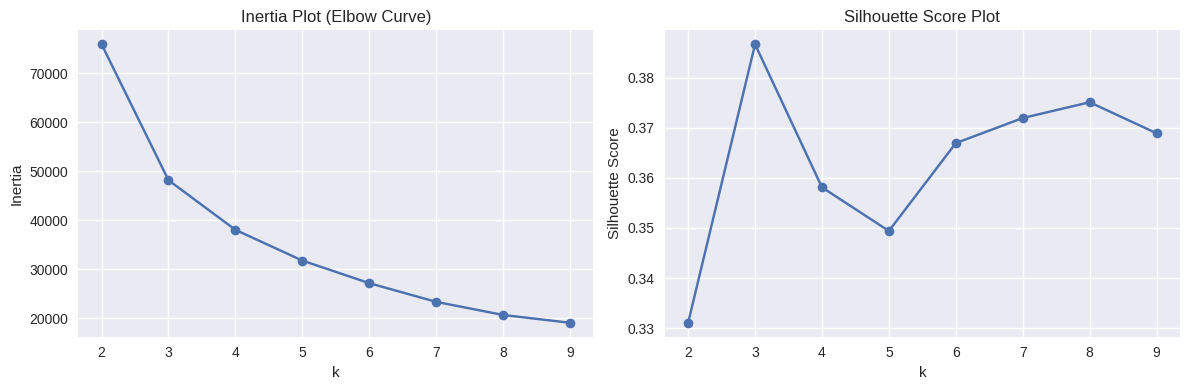

In [10]:
inertias = []
sil_scores = []
K = range(2, 10)

for k in K:
    km = KMeansClustering(n_clusters=k)
    km.fit(X_pca)
    inertias.append(calculate_inertia(X_pca, km.labels, km.centroids))
    sil_scores.append(silhouette_score(X_pca, km.labels))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertias, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Inertia Plot (Elbow Curve)")

plt.subplot(1, 2, 2)
plt.plot(K, sil_scores, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Plot")

plt.tight_layout()
plt.show()


/tmp/ipython-input-3895081260.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([sil_values[kmeans.labels == c] for c in clusters],


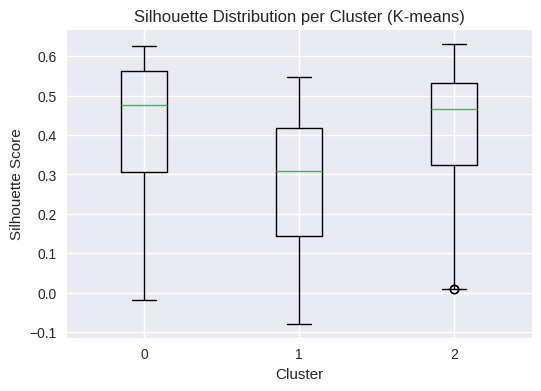

In [12]:
from sklearn.metrics import silhouette_samples

sil_values = silhouette_samples(X_pca, kmeans.labels)
clusters = np.unique(kmeans.labels)

plt.figure(figsize=(6, 4))
plt.boxplot([sil_values[kmeans.labels == c] for c in clusters],
            labels=clusters)
plt.xlabel("Cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Distribution per Cluster (K-means)")
plt.show()


## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!